# Projeto: Análise Banknote Authentication
<hr>

#### Respondendo a perguntas de negócio com base na exploração e análise do dataset Banknote Authentication  disponível no UCI Machine Learning Repository <br>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt',
                 header=None,
                 names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

#### Iniciando exploração do dataset

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


> #### Respondendo às perguntas



### Pergunta 1:
Qual o tamanho desse dataset (número de linhas, número de colunas)?

In [7]:
df.shape

(1372, 5)

### Pergunta 2:
Qual variável possui o maior range (diferença entre valor máximo e mínimo)?

In [8]:
for coluna in df.columns:
    result = df[coluna].max() - df[coluna].min()
    print(coluna, result)

variance 13.8669
skewness 26.7247
curtosis 23.2135
entropy 10.9977
class 1


### Pergunta 3:
Qual a média da coluna skewness?

In [9]:
df['skewness'].mean()

1.9223531206393585

### Pergunta 4:
Qual a média da coluna entropy?

In [10]:
df['entropy'].mean()

-1.1916565200437317

### Pergunta 5:
Qual a mediana da coluna variance?

In [11]:
df['variance'].median()

0.49617999999999995

### Pergunta 6:
Qual o desvio padrão da coluna curtosis?  

In [12]:
df['curtosis'].std()

4.310030090106595

### Pergunta 7:
Qual a porcentagem de exemplos do dataset que são cédulas falsas (class=1)?

In [13]:
calc_df = df[(df['class'] == 1)]

In [14]:
calc_final_df = (calc_df['class'].count() / df['class'].count()) * 100
print(round(calc_final_df, 2))

44.46


### Pergunta 8:
Qual o valor da correlação de Pearson entre as variáveis skewness e curtosis?

In [15]:
corr_df = df['skewness'].corr(df['curtosis'])
print(corr_df, 2)

-0.7868952243065794 2


> #### Preparando o dataset separando conjuntos de treino e teste conforme enunciado

In [16]:
X = df.drop('class', axis=1)
y = df['class']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Pergunta 9:
Qual a acurácia do KNN no conjunto de teste?


In [17]:
# Criando e treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("A acurácia do modelo KNN é:", accuracy)

A acurácia do modelo KNN é: 0.9975728155339806


### Pergunta 10:
Qual a acurácia da Árvore de Decisão no conjunto de teste?


In [18]:
# Criando e treinando o modelo Arvore de Decisão
clf_arvore = DecisionTreeClassifier(random_state=1)
clf_arvore.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = clf_arvore.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("A acurácia da Árvore de Decisão é:", accuracy,2)

A acurácia da Árvore de Decisão é: 0.9878640776699029 2


### Pergunta 11:
Qual a acurácia do Random Forest no conjunto de teste?


In [19]:
# Criando e treinando o modelo Random Forest
clf_rf = RandomForestClassifier(max_depth=8, random_state=1)
clf_rf.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = clf_rf.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("A acurácia da Random Forest é:", accuracy)

A acurácia da Random Forest é: 0.9951456310679612


### Pergunta 12:
Analisando o valor da importância relativa das features do Random Forest (atributo feature_importances_), qual feature melhor contribuiu para a predição de class?

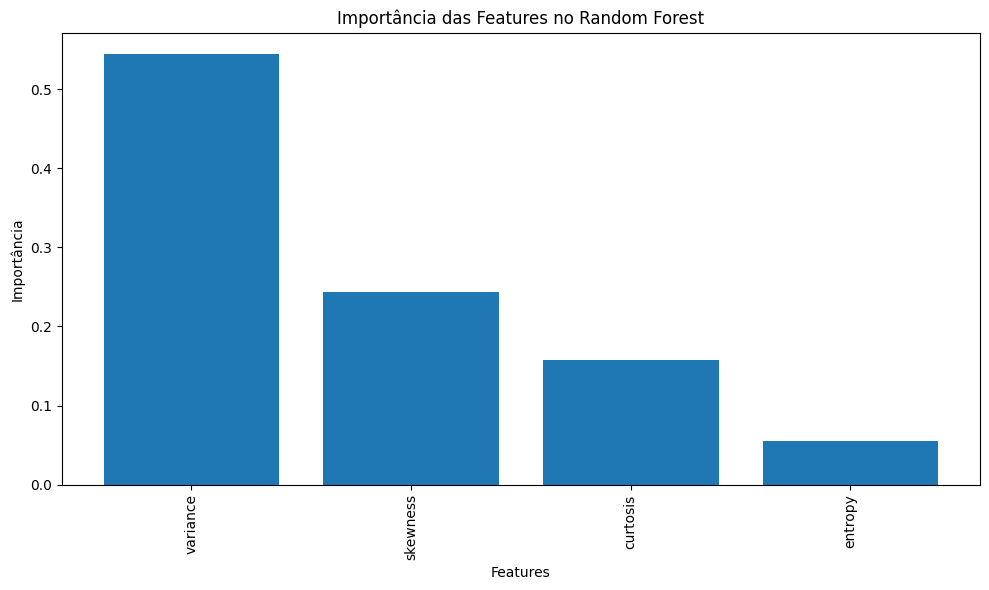

A feature mais importante é: variance


In [20]:
clf_rf.fit(df[['variance', 'skewness', 'curtosis', 'entropy']], df['class'])

# Analisar a importância das features
importances = clf_rf.feature_importances_

# Visualizar as importâncias
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), ['variance', 'skewness', 'curtosis', 'entropy'], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importância")
plt.title("Importância das Features no Random Forest")
plt.tight_layout()
plt.show()

# Identificar a feature mais importante
most_important_feature_index = np.argmax(importances)
most_important_feature_name = ['variance', 'skewness', 'curtosis', 'entropy'][most_important_feature_index]

print(f"A feature mais importante é: {most_important_feature_name}")

### Pergunta 13:
Qual o valor da importância relativa da feature skewness?


In [21]:
importances = clf_rf.feature_importances_

# Imprimir os valores de importância
print(importances[1])

0.24348844008918313


### Pergunta 14:
Qual a acurácia do SVM no conjunto de teste?

In [22]:
# Criando e treinando o modelo
clf_svm = SVC(gamma='auto',kernel='rbf', random_state=1)
clf_svm.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = clf_svm.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("A acurácia do SVM é:", accuracy)

A acurácia do SVM é: 1.0


### Pergunta 15:
Qual a acurácia da rede MLP no conjunto de teste?

In [23]:
# Criando e treinando o modelo
clf_mlp = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs', random_state=1)
clf_mlp.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = clf_mlp.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("A acurácia do MLP é:", accuracy)

A acurácia do MLP é: 1.0
